In [1]:
import os
import time

import dill
import matplotlib.pyplot as plt
import pyro
import seaborn as sns
import torch
import pyro.distributions as dist
from chirho.dynamical.handlers import LogTrajectory
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import simulate
from pyro.infer import Predictive
from chirho.observational.handlers import condition
from chirho.dynamical.handlers import LogTrajectory, StaticBatchObservation
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import Dynamics, State, simulate

pyro.settings.set(module_local_params=True)

sns.set_style("white")

seed = 123
pyro.clear_param_store()
pyro.set_rng_seed(seed)

import matplotlib.pyplot as plt
import seaborn as sns
import torch

from collab.foraging import locust as lc
from collab.foraging import toolkit as ft
from collab.utils import find_repo_root, progress_saver



In [2]:
locds = lc.LocustDS(data_code = "15EQ20191202", 
                    start =0,
                    end = 10,)

locds.run_inference("length", num_iterations= 1500,num_samples = 150, lr = 0.001,)

tensor(0.5094, dtype=torch.float64)


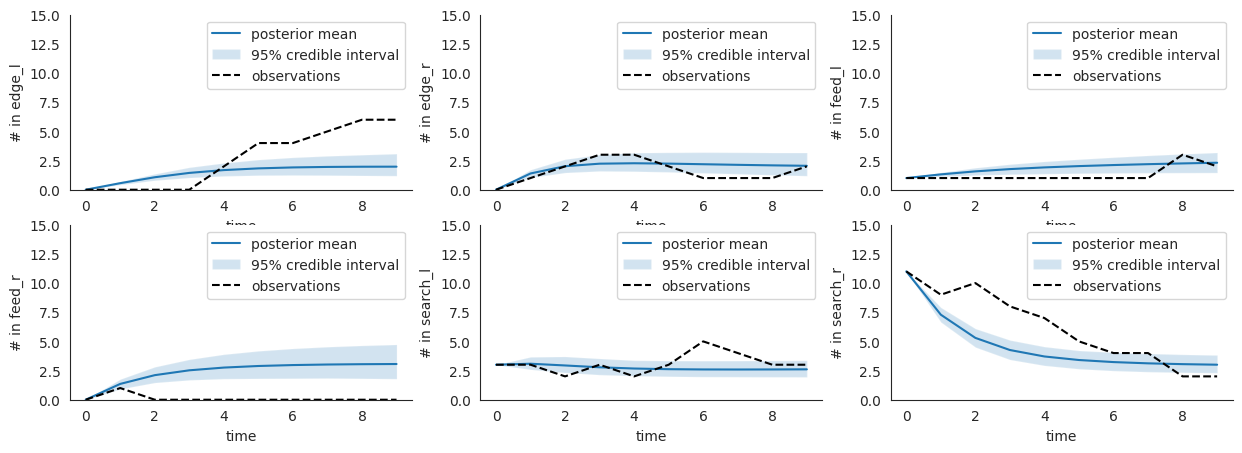

In [3]:
# validation data at this point are more even, easier to guess
locds.posterior_check()
locds.evaluate()
print(locds.rsquared)

tensor(0.5454, dtype=torch.float64)


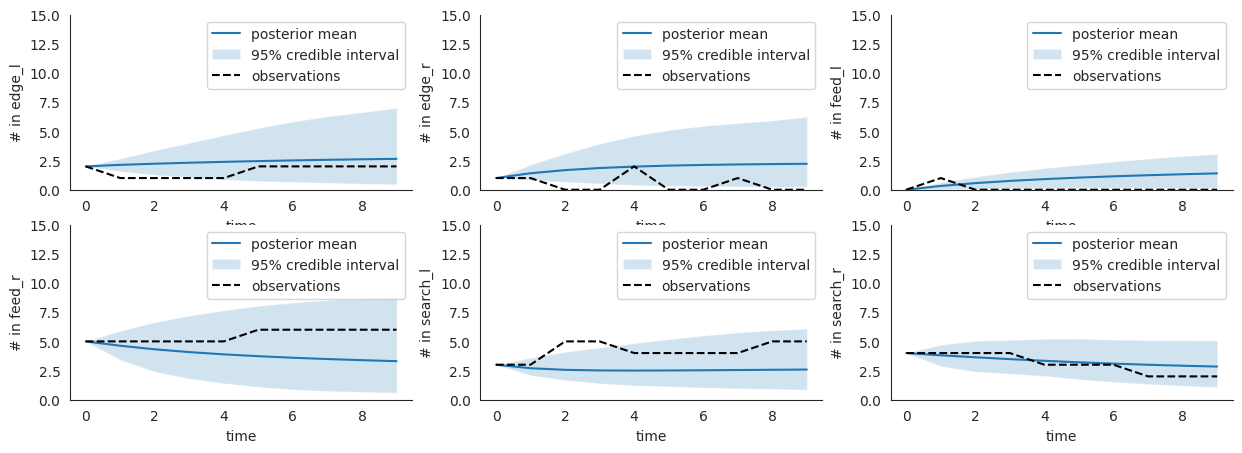

In [4]:
locds.validate(validation_data_code = "15EQ20191205")
print(locds.validation['15EQ20191205']['rsquared'])
locds.posterior_check(samples = locds.v_samples, subset= locds.v_subset)

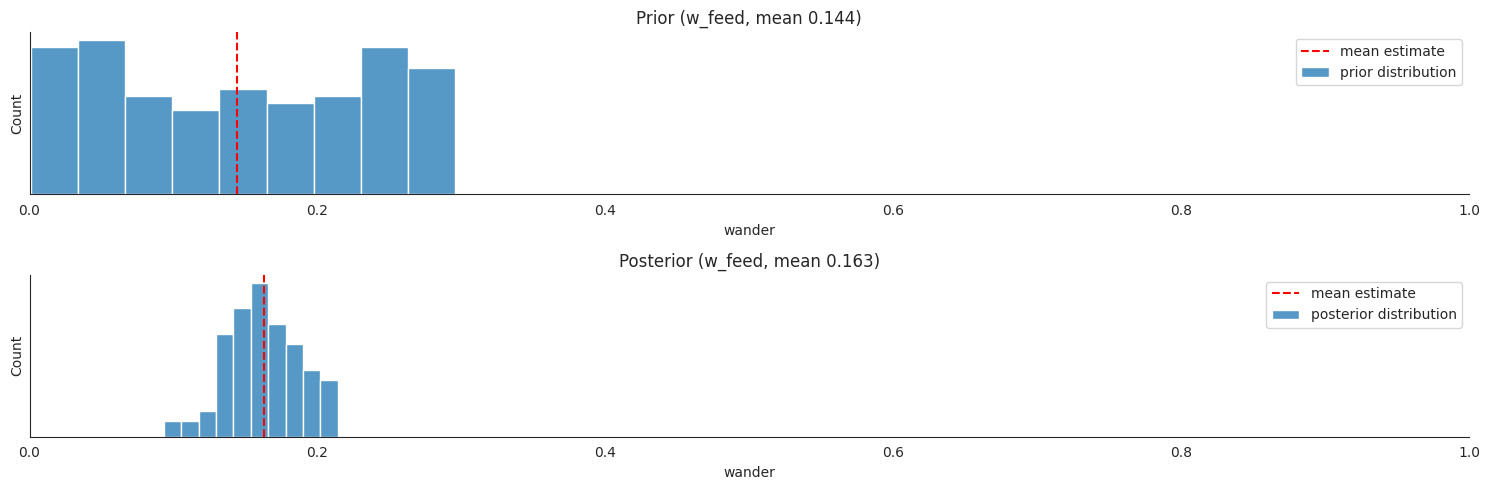

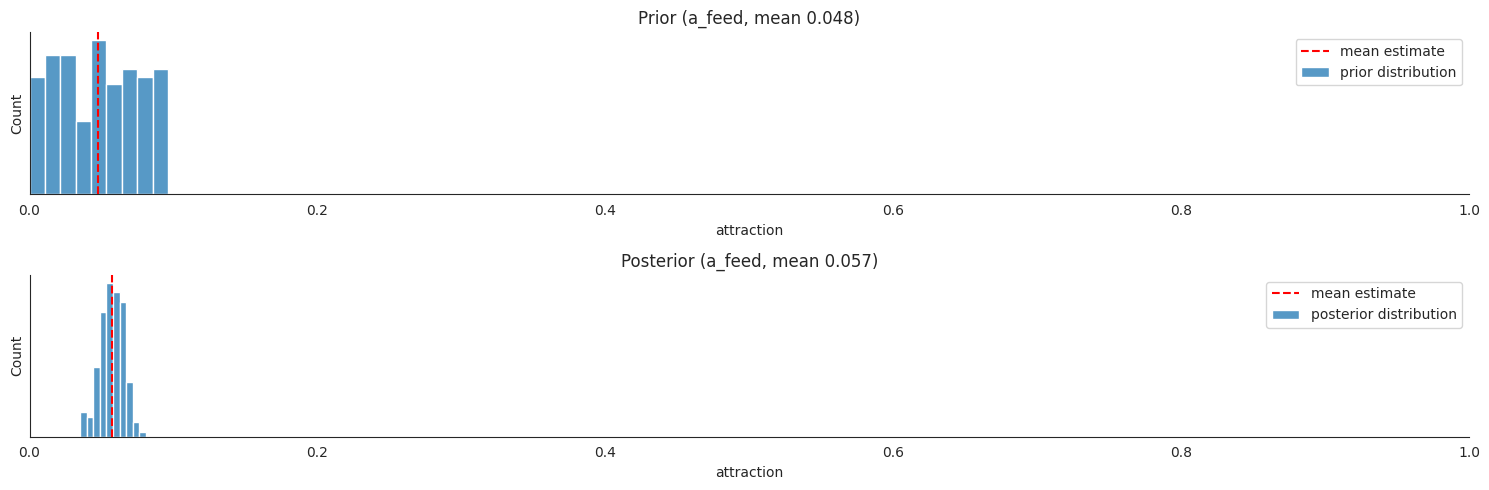

In [5]:
locds.get_prior_samples( num_samples= 150)
locds.plot_param_estimates(3,4)

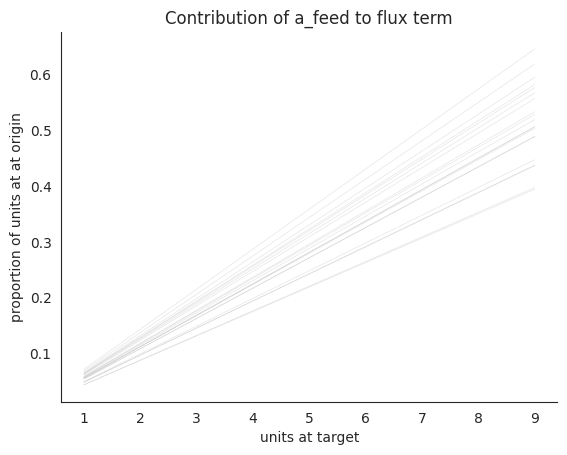

In [6]:
lc.plot_ds_interaction(
    locds.samples, "attraction", 4, xlim=10, num_lines=20
)

No samples file found, running inference


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


Running SVI for 1500 steps...
[iteration 0001] loss: 96.7594


/home/rafal/miniconda3/envs/collab/lib/python3.10/site-packages/pyro/util.py:303: UserWarning: Found vars in model but not guide: {'counts_obs'}
  warnings.warn(f"Found vars in model but not guide: {bad_sites}")


[iteration 0050] loss: 94.7426
[iteration 0100] loss: 92.8638
[iteration 0150] loss: 98.7302
[iteration 0200] loss: 98.4007
[iteration 0250] loss: 94.5821
[iteration 0300] loss: 96.2930
[iteration 0350] loss: 84.2629
[iteration 0400] loss: 90.2232
[iteration 0450] loss: 95.5232
[iteration 0500] loss: 92.4231
[iteration 0550] loss: 85.3788
[iteration 0600] loss: 88.6831
[iteration 0650] loss: 95.0997
[iteration 0700] loss: 87.1151
[iteration 0750] loss: 91.0290
[iteration 0800] loss: 90.9586
[iteration 0850] loss: 91.5015
[iteration 0900] loss: 93.7410
[iteration 0950] loss: 85.2950
[iteration 1000] loss: 88.8488
[iteration 1050] loss: 80.0064
[iteration 1100] loss: 85.9757
[iteration 1150] loss: 86.7538
[iteration 1200] loss: 87.8976
[iteration 1250] loss: 85.5939
[iteration 1300] loss: 81.0283
[iteration 1350] loss: 87.5120
[iteration 1400] loss: 77.8938
[iteration 1450] loss: 86.4733
[iteration 1500] loss: 78.1416


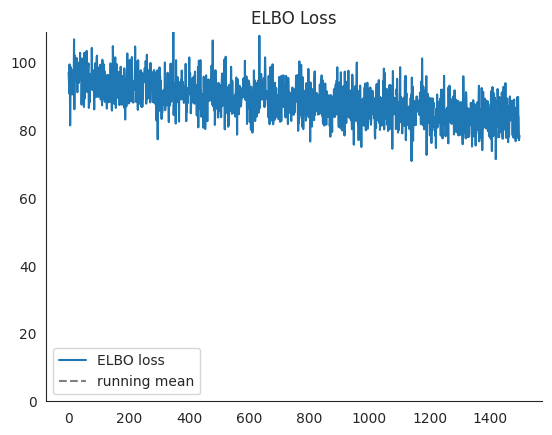

No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 99.7829
[iteration 0050] loss: 92.0127
[iteration 0100] loss: 104.1255
[iteration 0150] loss: 100.1240
[iteration 0200] loss: 104.3012
[iteration 0250] loss: 97.2061
[iteration 0300] loss: 97.8200
[iteration 0350] loss: 96.0917
[iteration 0400] loss: 96.5354
[iteration 0450] loss: 91.1159
[iteration 0500] loss: 94.9062
[iteration 0550] loss: 92.2200
[iteration 0600] loss: 97.3663
[iteration 0650] loss: 92.2546
[iteration 0700] loss: 97.6651
[iteration 0750] loss: 99.8062
[iteration 0800] loss: 95.9922
[iteration 0850] loss: 83.5424
[iteration 0900] loss: 92.5498
[iteration 0950] loss: 80.6604
[iteration 1000] loss: 87.7985
[iteration 1050] loss: 88.6027
[iteration 1100] loss: 85.9973
[iteration 1150] loss: 82.8331
[iteration 1200] loss: 85.2194
[iteration 1250] loss: 91.6510
[iteration 1300] loss: 96.2738
[iteration 1350] loss: 90.2557
[iteration 1400] loss: 88.6798
[iteration 1450] loss: 88.0

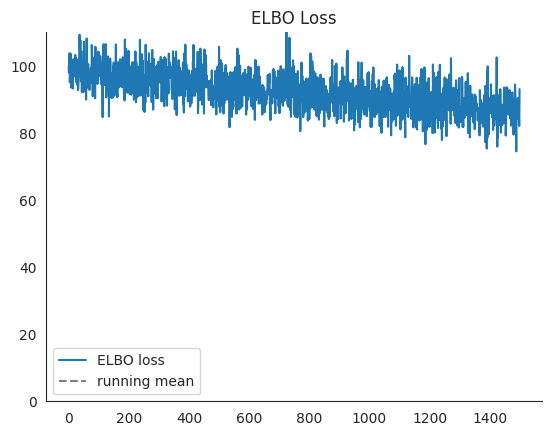

No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 92.2579
[iteration 0050] loss: 94.0442
[iteration 0100] loss: 93.7430
[iteration 0150] loss: 90.1467
[iteration 0200] loss: 95.3073
[iteration 0250] loss: 89.7940
[iteration 0300] loss: 94.5700
[iteration 0350] loss: 88.9848
[iteration 0400] loss: 99.9541
[iteration 0450] loss: 96.6384
[iteration 0500] loss: 87.6439
[iteration 0550] loss: 89.5945
[iteration 0600] loss: 90.9847
[iteration 0650] loss: 94.7397
[iteration 0700] loss: 96.2278
[iteration 0750] loss: 95.0084
[iteration 0800] loss: 93.7835
[iteration 0850] loss: 78.8184
[iteration 0900] loss: 87.6647
[iteration 0950] loss: 87.5845
[iteration 1000] loss: 87.7700
[iteration 1050] loss: 83.4073
[iteration 1100] loss: 88.2349
[iteration 1150] loss: 79.9802
[iteration 1200] loss: 82.7498
[iteration 1250] loss: 88.1106
[iteration 1300] loss: 88.7006
[iteration 1350] loss: 88.6656
[iteration 1400] loss: 85.0226
[iteration 1450] loss: 87.1143

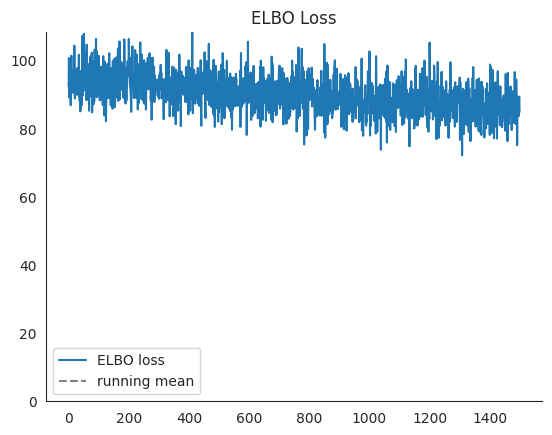

No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 101.4537
[iteration 0050] loss: 98.4024
[iteration 0100] loss: 92.8291
[iteration 0150] loss: 96.9049
[iteration 0200] loss: 93.6669
[iteration 0250] loss: 88.2996
[iteration 0300] loss: 89.7412
[iteration 0350] loss: 100.8250
[iteration 0400] loss: 90.0195
[iteration 0450] loss: 102.0412
[iteration 0500] loss: 97.4120
[iteration 0550] loss: 94.1794
[iteration 0600] loss: 89.8101
[iteration 0650] loss: 95.8329
[iteration 0700] loss: 92.5655
[iteration 0750] loss: 85.8081
[iteration 0800] loss: 91.6300
[iteration 0850] loss: 83.9490
[iteration 0900] loss: 92.4545
[iteration 0950] loss: 85.5075
[iteration 1000] loss: 94.9627
[iteration 1050] loss: 89.3975
[iteration 1100] loss: 93.2985
[iteration 1150] loss: 85.4374
[iteration 1200] loss: 92.1591
[iteration 1250] loss: 87.6400
[iteration 1300] loss: 83.5901
[iteration 1350] loss: 94.2880
[iteration 1400] loss: 88.1354
[iteration 1450] loss: 80.2

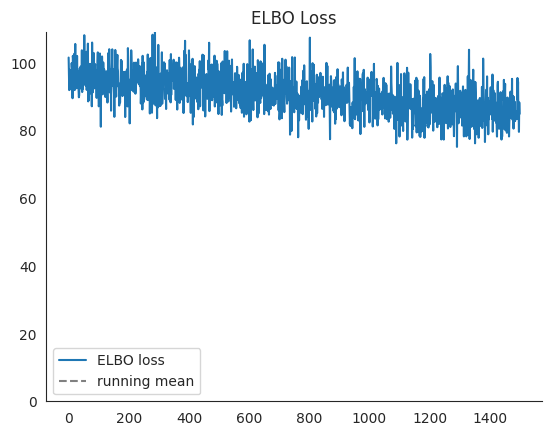

No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 101.2094
[iteration 0050] loss: 92.0567
[iteration 0100] loss: 97.4357
[iteration 0150] loss: 103.8561
[iteration 0200] loss: 91.0374
[iteration 0250] loss: 95.4489
[iteration 0300] loss: 94.1693
[iteration 0350] loss: 93.2218
[iteration 0400] loss: 91.8600
[iteration 0450] loss: 101.2309
[iteration 0500] loss: 100.8789
[iteration 0550] loss: 106.1054
[iteration 0600] loss: 94.2546
[iteration 0650] loss: 99.9480
[iteration 0700] loss: 91.8340
[iteration 0750] loss: 90.1494
[iteration 0800] loss: 95.7444
[iteration 0850] loss: 96.7331
[iteration 0900] loss: 89.6409
[iteration 0950] loss: 89.3770
[iteration 1000] loss: 101.7089
[iteration 1050] loss: 83.8037
[iteration 1100] loss: 89.6216
[iteration 1150] loss: 85.3903
[iteration 1200] loss: 89.9614
[iteration 1250] loss: 95.5070
[iteration 1300] loss: 87.2264
[iteration 1350] loss: 85.5958
[iteration 1400] loss: 101.9839
[iteration 1450] loss: 

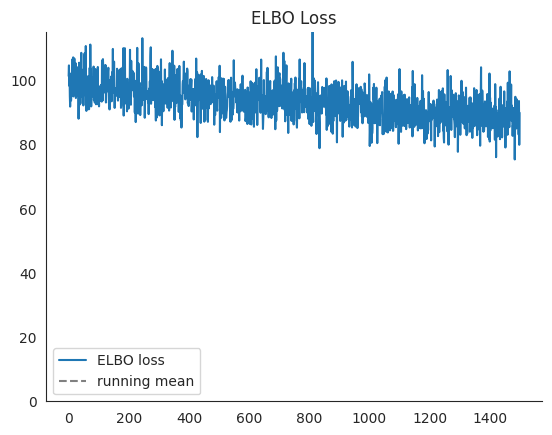

No samples file found, running inference
Running SVI for 1500 steps...
[iteration 0001] loss: 93.5964
[iteration 0050] loss: 82.9379
[iteration 0100] loss: 92.8579
[iteration 0150] loss: 92.2609
[iteration 0200] loss: 91.8938
[iteration 0250] loss: 95.8453
[iteration 0300] loss: 87.8904
[iteration 0350] loss: 90.8967
[iteration 0400] loss: 83.8729
[iteration 0450] loss: 95.6224
[iteration 0500] loss: 78.3587
[iteration 0550] loss: 86.8741
[iteration 0600] loss: 80.6195
[iteration 0650] loss: 94.3954
[iteration 0700] loss: 88.5221
[iteration 0750] loss: 108.1704
[iteration 0800] loss: 88.9239
[iteration 0850] loss: 79.9427
[iteration 0900] loss: 92.2230
[iteration 0950] loss: 97.4954
[iteration 1000] loss: 88.7462
[iteration 1050] loss: 87.2961
[iteration 1100] loss: 82.4427
[iteration 1150] loss: 86.5113
[iteration 1200] loss: 88.4300
[iteration 1250] loss: 76.9721
[iteration 1300] loss: 74.1839
[iteration 1350] loss: 81.9733
[iteration 1400] loss: 89.6344
[iteration 1450] loss: 90.927

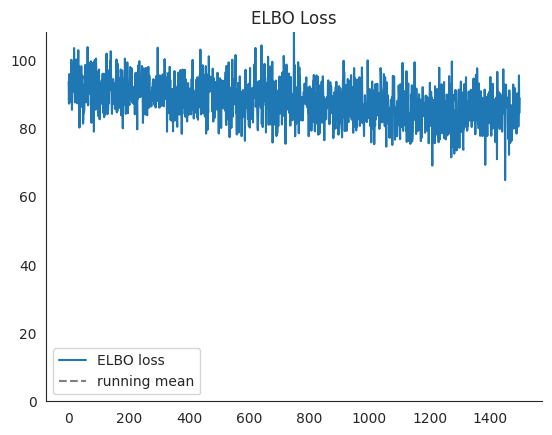

In [12]:
data_code = "15EQ20191202"

samples_a_feed_10 = []

root = find_repo_root()
data_path =  os.path.join(
            root, 
        f"data/foraging/locust/ds/locust_samples_a_feed_10.pkl"
        )

if os.path.exists(data_path):
    with open(data_path, "rb") as f:
        samples_a_feed_10 = dill.load(f)
else:


    for start in [0, 20, 40, 60, 80, 100 ]:
        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = start + 10,)
    
        locds.run_inference("length", num_iterations= 1500,num_samples = 150, lr = 0.001, force = True)
        samples_a_feed_10.append(locds.samples['attraction'][:, 4])

    with open(data_path, "wb") as f:
        dill.dump(samples_a_feed_10, f)

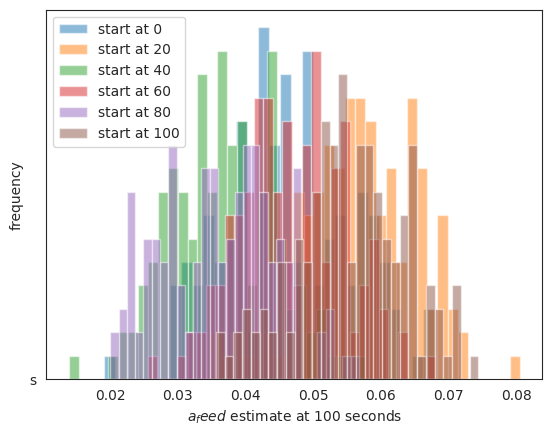

In [14]:
start = [0, 20, 40, 60, 80, 100 ]
for s, tensor in zip(start, samples_a_feed_10):
    plt.hist(tensor, bins=30, alpha=0.5, label=f'start at {s}')

plt.xlabel('$a_{feed}$')
plt.ylabel('frequency')
plt.legend()

plt.show()

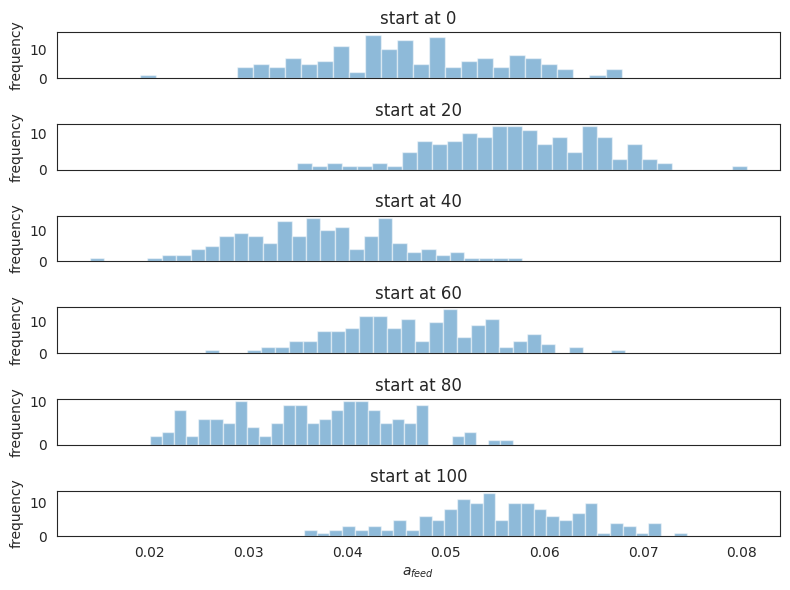

In [17]:
start = [0, 20, 40, 60, 80, 100]

fig, axs = plt.subplots(len(start), 1, figsize=(8, 6), sharex=True)

for i, (s, tensor) in enumerate(zip(start, samples_a_feed_10)):
    axs[i].hist(tensor, bins=30, alpha=0.5, label=f'start at {s}')
    axs[i].set_ylabel('frequency')
    axs[i].title.set_text(f'start at {s}')

axs[-1].set_xlabel('$a_{feed}$')
plt.tight_layout()
plt.show()
